## THÊM THƯ VIỆN VÀ DATASET

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (pd.read_csv)
from sklearn.utils import resample
from sklearn import preprocessing

import os 

dspath = []
for dirname, _, filenames in os.walk('E:/DoAnTN/new dataset'):
    for filename in filenames:
        if filename.endswith('.csv'):
            dfp = os.path.join(dirname, filename)
            dspath.append(dfp)

cols = list(pd.read_csv(dspath[0], nrows=1))

def load_file(path):
    data = pd.read_csv(path)

    return data

In [2]:
dframe = pd.concat([load_file(dfp) for dfp in dspath], ignore_index=True)

## MÔ TẢ DATASET

In [3]:
dframe.shape

(6998890, 91)

In [4]:
label_counts = dframe['Label'].value_counts()
print(label_counts)

Label
BENIGN                          3498399
DoS Hulk                        1803160
DDoS-HOIC                       1082293
DDoS-LOIC-HTTP                   289328
Botnet Ares                      142921
SSH-BruteForce                    94197
Infiltration - NMAP Portscan      49740
DoS GoldenEye                     22560
DoS Slowloris                      8490
FTP-BruteForce                     4950
DDoS-LOIC-UDP                      2527
Web Attack - XSS                    146
Web Attack - SQL                    117
Web Attack - Brute Force             62
Name: count, dtype: int64


In [5]:
dframe.loc[dframe['Label'] == "DoS Slowloris", 'Label'] = "DoS Attack"
dframe.loc[dframe['Label'] == "DoS Hulk", 'Label'] = "DoS Attack"
dframe.loc[dframe['Label'] == "DDoS-HOIC", 'Label'] = "DoS Attack"
dframe.loc[dframe['Label'] == "DDoS-LOIC-HTTP", 'Label'] = "DoS Attack"
dframe.loc[dframe['Label'] == "DDoS-LOIC-UDP", 'Label'] = "DoS Attack"
dframe.loc[dframe['Label'] == "DoS GoldenEye", 'Label'] = "DoS Attack"

In [6]:
dframe.loc[dframe['Label'] == "Web Attack - Brute Force", 'Label'] = "Web Attack"
dframe.loc[dframe['Label'] == "Web Attack - XSS", 'Label'] = "Web Attack"
dframe.loc[dframe['Label'] == "Web Attack - SQL", 'Label'] = "Web Attack"

In [7]:
dframe.loc[dframe['Label'] == "SSH-BruteForce", 'Label'] = "Brute Force"
dframe.loc[dframe['Label'] == "FTP-BruteForce", 'Label'] = "Brute Force"

In [8]:
dframe.dropna(inplace=True)
dframe['Label'].unique()

array(['BENIGN', 'Botnet Ares', 'Brute Force', 'Web Attack', 'DoS Attack',
       'Infiltration - NMAP Portscan'], dtype=object)

In [9]:
cnt_benign = len(dframe[dframe['Label'] == 'BENIGN'])
cnt_DoS = len(dframe[dframe['Label'] == 'DoS Attack'])
cnt_BruteForce = len(dframe[dframe['Label'] == 'Brute Force'])
cnt_PortScan = len(dframe[dframe['Label'] == 'Infiltration - NMAP Portscan'])
cnt_Bot = len(dframe[dframe['Label'] == 'Botnet Ares'])
cnt_WebAttack = len(dframe[dframe['Label'] == 'Web Attack'])


# Print the counts
print("BENIGN Flows: " + str(cnt_benign))
print("DoS Attacks: " + str(cnt_DoS))
print("Brute Force Attacks: " + str(cnt_BruteForce))
print("PortScan Attacks: " + str(cnt_PortScan))
print("Bot Attacks: " + str(cnt_Bot))
print("Web Attacks: " + str(cnt_WebAttack))

print("TOTAL LENGTH OF DATA: " + str(sum([cnt_benign, cnt_DoS, cnt_BruteForce, cnt_PortScan, cnt_Bot, cnt_WebAttack])))

BENIGN Flows: 3493605
DoS Attacks: 3208358
Brute Force Attacks: 94197
PortScan Attacks: 49740
Bot Attacks: 142921
Web Attacks: 325
TOTAL LENGTH OF DATA: 6989146


In [10]:
class_counts = dframe['Label'].value_counts()

In [11]:
import pandas as pd

# Select classes with more than 1000 samples
selected_classes = class_counts[class_counts > 1000]
class_names = selected_classes.index

# Filter the data to keep only the selected classes
selected = dframe[dframe['Label'].isin(class_names)]

# Initialize a list to store balanced dataframes
dfs = []

# Iterate over each class name to balance the dataset
for name in class_names:
    df_class = selected[selected['Label'] == name]
    
    if name == 'BENIGN' or name == 'DoS Attack':
        # Downsample 'BENIGN' and 'DoS Attack' to balance with other classes
        balancing = min(len(df_class), (len(selected[selected['Label'] == 'Brute Force']) + 
                                        len(selected[selected['Label'] == 'Infiltration - NMAP Portscan']) + 
                                        len(selected[selected['Label'] == 'Botnet Ares'])) // 2)
        dfs.append(df_class.sample(n=balancing, random_state=42))
    else:
        # Keep other classes as they are
        dfs.append(df_class)

# Concatenate all balanced dataframes
dframe= pd.concat(dfs)

# Check the number of samples for each class
print(dframe['Label'].value_counts())


Label
BENIGN                          143429
DoS Attack                      143429
Botnet Ares                     142921
Brute Force                      94197
Infiltration - NMAP Portscan     49740
Name: count, dtype: int64


In [12]:
cnt_benign = len(dframe[dframe['Label'] == 'BENIGN'])
cnt_DoS = len(dframe[dframe['Label'] == 'DoS Attack'])
cnt_BruteForce = len(dframe[dframe['Label'] == 'Brute Force'])
cnt_PortScan = len(dframe[dframe['Label'] == 'Infiltration - NMAP Portscan'])
cnt_Bot = len(dframe[dframe['Label'] == 'Botnet Ares'])
cnt_WebAttack = len(dframe[dframe['Label'] == 'Web Attack'])


# Print the counts
print("BENIGN Flows: " + str(cnt_benign))
print("DoS Attacks: " + str(cnt_DoS))
print("Brute Force Attacks: " + str(cnt_BruteForce))
print("PortScan Attacks: " + str(cnt_PortScan))
print("Bot Attacks: " + str(cnt_Bot))
print("Web Attacks: " + str(cnt_WebAttack))

print("TOTAL LENGTH OF DATA: " + str(sum([cnt_benign, cnt_DoS, cnt_BruteForce, cnt_PortScan, cnt_Bot, cnt_WebAttack])))

BENIGN Flows: 143429
DoS Attacks: 143429
Brute Force Attacks: 94197
PortScan Attacks: 49740
Bot Attacks: 142921
Web Attacks: 0
TOTAL LENGTH OF DATA: 573716


In [13]:
print(dframe.columns)

Index(['id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd RST Flags',
       'Bwd RST Flags', 'Fwd Header Length', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min',
       'Packet Length Max', 'Packet Length

In [14]:
dframe.head()

,id,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time,Label,Attempted Category
1946103,1440372.0,172.31.64.51-172.31.0.2-64567-53-17,172.31.64.51,64567,172.31.0.2,53,17,2018-02-16 18:35:42.619981,968,1,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,-1.0,-1.0,0.0,BENIGN,-1.0
3125986,526971.0,172.31.65.27-23.218.137.213-52006-443-6,172.31.65.27,52006,23.218.137.213,443,6,2018-02-21 18:49:45.454815,115461891,21,...,30396.0,1.000630e+07,5.056968e+03,10013512.0,10000260.0,-1.0,-1.0,115461891.0,BENIGN,-1.0
1252087,746356.0,172.31.69.14-54.82.26.220-54078-443-6,172.31.69.14,54078,54.82.26.220,443,6,2018-02-16 20:04:19.940736,118198306,8,...,57042.0,2.946484e+07,1.106363e+07,39939212.0,18051864.0,-1.0,-1.0,480100123.0,BENIGN,-1.0
615718,109984.0,175.195.219.31-172.31.64.26-49484-3389-6,175.195.219.31,49484,172.31.64.26,3389,6,2018-02-16 21:09:38.394854,2294241,8,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,-1.0,-1.0,2294241.0,BENIGN,-1.0
3572959,973945.0,172.31.65.126-23.218.74.127-50375-443-6,172.31.65.126,50375,23.218.74.127,443,6,2018-02-21 14:37:44.562552,115949885,28,...,20904.0,9.630927e+06,1.315085e+06,10106645.0,5456089.0,-1.0,-1.0,115949885.0,BENIGN,-1.0


# Tiền xử lý dữ liệu

In [15]:
drop_columns = [
    'id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Protocol', 'Timestamp',
    'Total TCP Flow Time', 'ICMP Code', 'ICMP Type', 'Attempted Category', 'Fwd RST Flags', 'Bwd RST Flags'
]

In [16]:
rename_columns = {
    'Dst Port': 'Destination Port',
    'Total Fwd Packet': 'Total Fwd Packets',
    'Total Bwd packets': 'Total Backward Packets',
    'Total Length of Fwd Packet': 'Total Length of Fwd Packets',
    'Total Length of Bwd Packet': 'Total Length of Bwd Packets',
    'Fwd Act Data Pkts': 'act_data_pkt_fwd',
    'FWD Init Win Bytes': 'Init_Win_bytes_forward',
    'Bwd Init Win Bytes': 'Init_Win_bytes_backward',
    'Fwd Seg Size Min': 'min_seg_size_forward'
}

In [17]:
col_names = {col: col.strip() for col in dframe.columns}
dframe.columns = [col.strip() for col in dframe.columns]   
dframe.rename(columns=rename_columns, inplace=True)
dframe.drop(columns=drop_columns, inplace=True, errors='ignore')



In [18]:
dframe.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [19]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573716 entries, 1946103 to 6998887
Data columns (total 78 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             573716 non-null  int64  
 1   Flow Duration                573716 non-null  int64  
 2   Total Fwd Packets            573716 non-null  int64  
 3   Total Backward Packets       573716 non-null  int64  
 4   Total Length of Fwd Packets  573716 non-null  float64
 5   Total Length of Bwd Packets  573716 non-null  float64
 6   Fwd Packet Length Max        573716 non-null  float64
 7   Fwd Packet Length Min        573716 non-null  float64
 8   Fwd Packet Length Mean       573716 non-null  float64
 9   Fwd Packet Length Std        573716 non-null  float64
 10  Bwd Packet Length Max        573716 non-null  float64
 11  Bwd Packet Length Min        573716 non-null  float64
 12  Bwd Packet Length Mean       573716 non-null  float64
 1

## Thay thế Infinity và Nan bằng Giá trị trung bình của tính năng

In [20]:
for column in dframe.columns:
    if pd.api.types.is_numeric_dtype(dframe[column]):
        col_mean = dframe[column][np.isfinite(dframe[column])].mean()
        dframe[column].replace([np.nan, np.inf, -np.inf], col_mean, inplace=True)

C:\Users\hoang\AppData\Local\Temp\ipykernel_11324\1334390219.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dframe[column].replace([np.nan, np.inf, -np.inf], col_mean, inplace=True)


## Xóa các bản ghi trùng lặp

In [21]:
print(dframe.duplicated().sum(), "fully duplicates removed")
dframe.drop_duplicates(inplace=True)
dframe.reset_index(inplace=True, drop=True)

28958 fully duplicates removed


In [22]:
dframe.shape

(544758, 78)

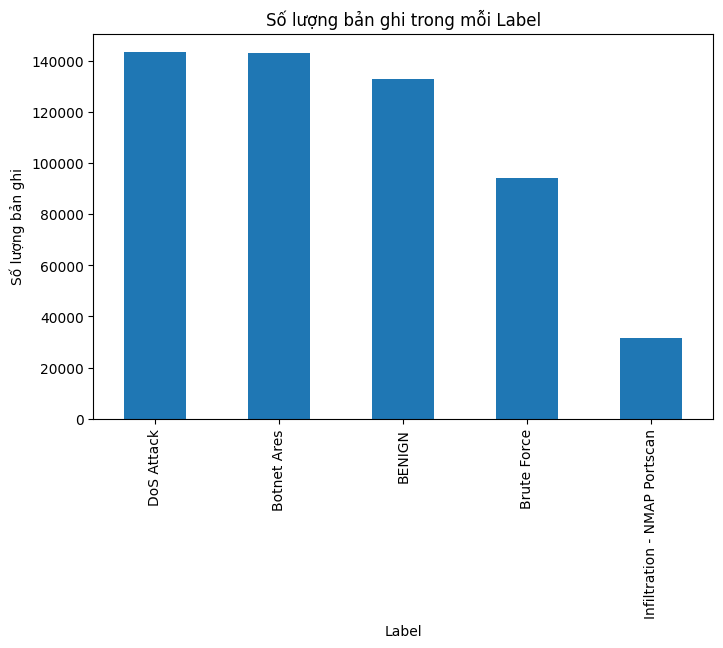

In [23]:
import matplotlib.pyplot as plt
# Đếm số lần xuất hiện của mỗi nhãn
label_num = dframe['Label'].value_counts()

# Tạo biểu đồ thanh để trực quan hóa số lượng nhãn
plt.figure(figsize=(8, 5))
label_num.plot(kind='bar')
plt.title('Số lượng bản ghi trong mỗi Label')
plt.xlabel('Label')
plt.ylabel('Số lượng bản ghi')
plt.show()

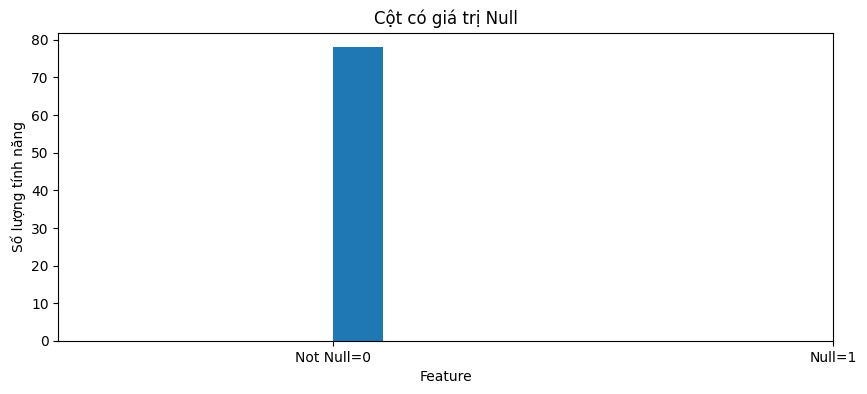

In [24]:
#Kiểm tra các giá trị null trong tập dữ liệu.
plt.figure(1,figsize=( 10,4))
plt.hist( dframe.isna().sum())
# Đặt tiêu đề và nhãn trục
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Cột có giá trị Null')
plt.xlabel('Feature')
plt.ylabel('Số lượng tính năng')

# Show the plot
plt.show()

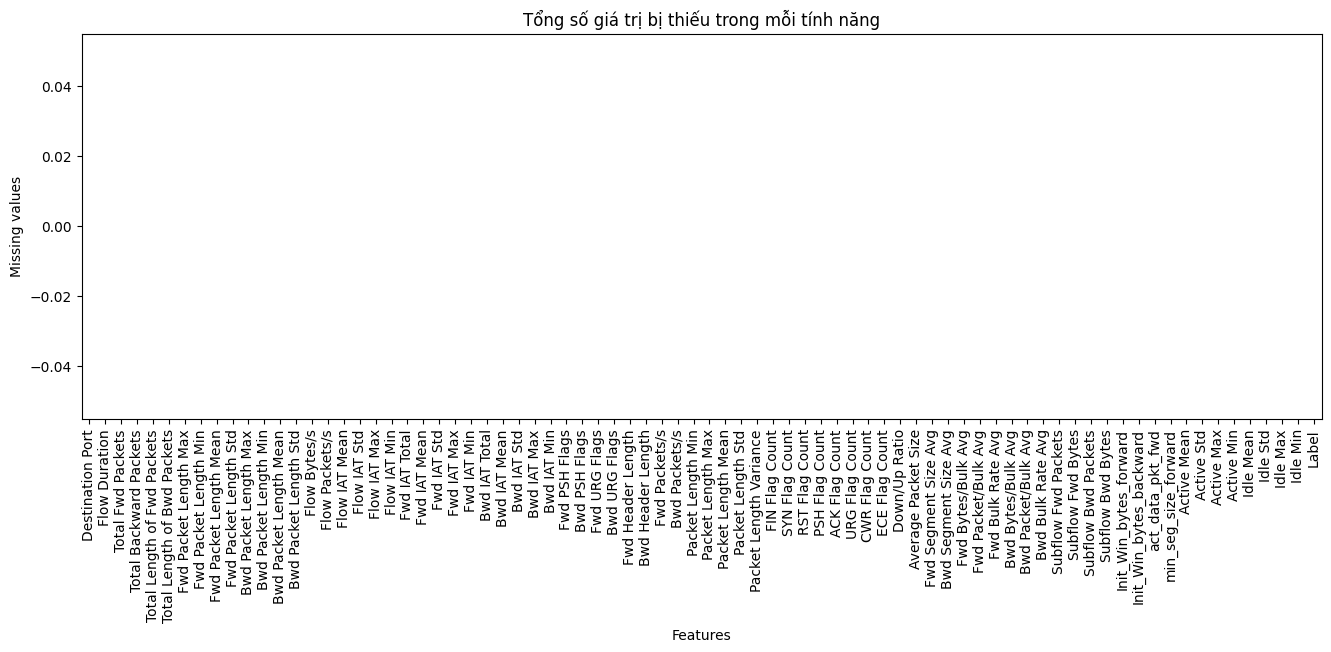

In [25]:
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum() # Đếm giá trị null cho mỗi cột
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Tổng số giá trị bị thiếu trong mỗi tính năng")
    plt.show()

plotMissingValues(dframe)


In [26]:
## Xóa các giá trị null
data_f=dframe.dropna()

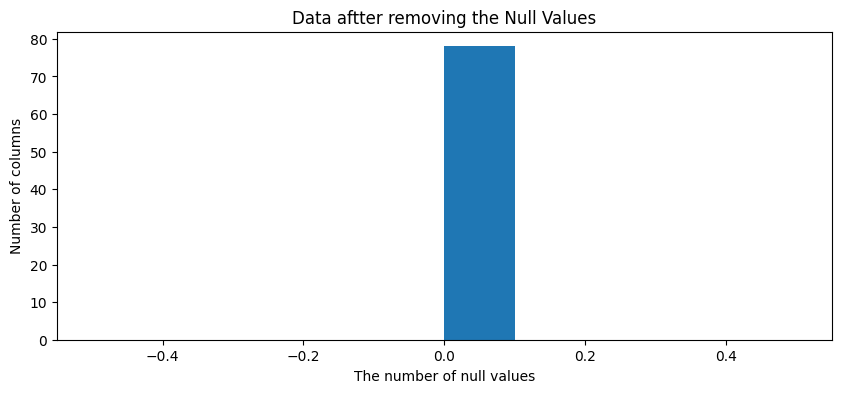

In [27]:
#Kiểm tra các giá trị null trong tập dữ liệu.
plt.figure(1,figsize=( 10,4))
plt.hist( data_f.isna().sum())
# Đặt tiêu đề và axis labels
plt.title('Data aftter removing the Null Values')
plt.xlabel('The number of null values')
plt.ylabel('Number of columns')

# Show the plot
plt.show()


In [28]:
pd.set_option('use_inf_as_na', True)  # Treat inf as NaN
null_values=data_f.isnull().sum()  # Kiểm tra giá trị NaN

C:\Users\hoang\AppData\Local\Temp\ipykernel_11324\818279732.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na', True)  # Treat inf as NaN


In [29]:
(data_f.dtypes=='object')

Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                           True
Length: 78, dtype: bool

## Mã hóa các Label

In [30]:
# Import thư viện LabelEncoder từ sklearn
from sklearn.preprocessing import LabelEncoder

# Tạo đối tượng mã hóa nhãn
label_encoder = LabelEncoder()

# Fit đối tượng mã hóa nhãn vào cột nhãn và biến đổi các nhãn
dframe['Label'] = label_encoder.fit_transform(dframe['Label'])

# Lấy ánh xạ giữa các nhãn gốc và các giá trị đã mã hóa
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# In ra ánh xạ
for label, encoded_value in label_mapping.items():
    print(f"Label: {label} - Encoded Value: {encoded_value}")


Label: BENIGN - Encoded Value: 0
Label: Botnet Ares - Encoded Value: 1
Label: Brute Force - Encoded Value: 2
Label: DoS Attack - Encoded Value: 3
Label: Infiltration - NMAP Portscan - Encoded Value: 4


## Data exploring

In [31]:
dframe.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,544758.000000,5.447580e+05,544758.000000,544758.000000,5.447580e+05,5.447580e+05,544758.000000,544758.000000,544758.000000,544758.000000,...,544758.000000,5.447580e+05,5.447580e+05,5.447580e+05,5.447580e+05,5.447580e+05,5.447580e+05,5.447580e+05,5.447580e+05,544758.000000
mean,2837.995631,5.092530e+06,36.280148,9.202233,2.167459e+03,2.792392e+03,439.942655,4.249377,98.280337,151.108800,...,22.979429,9.494052e+04,1.415033e+04,1.162164e+05,8.650556e+04,2.183893e+06,2.353178e+05,2.363113e+06,1.995760e+06,1.628508
std,4973.813052,2.014502e+07,1861.437088,93.219038,6.328008e+04,1.341580e+05,2332.975659,15.130414,868.235428,808.407049,...,7.515193,8.402383e+05,2.594467e+05,9.648187e+05,8.166868e+05,9.885453e+06,2.580829e+06,1.054031e+07,9.589820e+06,1.262344
min,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,53.000000,1.153400e+04,5.000000,5.000000,2.840000e+02,1.290000e+02,249.000000,0.000000,52.000000,104.609674,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
50%,80.000000,7.574550e+04,5.000000,5.000000,3.260000e+02,9.350000e+02,326.000000,0.000000,65.200000,138.189001,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,8080.000000,3.756510e+05,8.000000,7.000000,8.580000e+02,1.579000e+03,416.000000,0.000000,76.615385,145.791632,...,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000
max,65389.000000,1.200000e+08,184271.000000,21180.000000,6.380770e+06,3.082863e+07,64972.000000,500.000000,31358.142857,25412.394228,...,44.000000,1.119924e+08,7.708024e+07,1.119924e+08,1.119924e+08,1.199889e+08,7.036120e+07,1.199889e+08,1.199889e+08,4.000000


## Vẽ biểu đồ phân bố các tính năng

In [32]:
# Tạo biểu đồ biểu đồ cho từng tính năng
# plt.figure(5)
# for col in data_f.columns:
#     plt.hist(data_f[col])
#     plt.title(col)
#     plt.show()

## Cân bằng dữ liệu và tách dataset  

In [33]:
from imblearn.over_sampling import SMOTE

# Chuẩn bị dữ liệu cho SMOTE
X = dframe.drop('Label', axis=1)
y = dframe['Label']

# Áp dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

# Tạo DataFrame từ dữ liệu đã cân bằng
blnc_data = pd.DataFrame(X_upsampled)
blnc_data['Label'] = y_upsampled
blnc_data = blnc_data.sample(frac=1)

# Kiểm tra phân phối nhãn sau khi cân bằng
blnc_data['Label'].value_counts()


Label
3    143408
4    143408
2    143408
1    143408
0    143408
Name: count, dtype: int64

In [34]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.preprocessing import MinMaxScaler
# Chuẩn bị dữ liệu để huấn luyện mô hình
X = blnc_data.drop('Label', axis=1)  # Đặc trưng
y = blnc_data['Label']  # Nhãn
# X = dframe.drop('Label', axis=1)  # Đặc trưng
# y = dframe['Label']  # Nhãn
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Lưu scaler bằng joblib
joblib.dump(scaler, 'scaler.pkl')
# In thông tin sau khi chuẩn hóa

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_val1, y_train, y_val1 = train_test_split(X, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_val1, y_val1, test_size=0.5, random_state=0)
# print("Trung bình sau chuẩn hóa:", X_train.mean(axis=0))
# print("Độ lệch chuẩn sau chuẩn hóa:", X_train.std(axis=0))

In [35]:
X_train.shape, y_train.shape, y_test.shape

((430224, 77), (430224,), (143408,))

# Xây dựng mô hình và training

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Conv1D, MaxPooling1D, Flatten, Input, GRU, SimpleRNN, concatenate
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Embedding, UpSampling1D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import os
from sklearn.utils.class_weight import compute_class_weight
# Create directories to save models and results
os.makedirs('./models', exist_ok=True)
os.makedirs('./results', exist_ok=True)

# Define input shape and number of classes
input_shape = (X_train.shape[1], 1)
num_classes = len(label_encoder.classes_)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

# Reshape data
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_reshaped = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


# Inception module function
def inception_module(x, filters):
    branch1 = Conv1D(filters, 1, padding='same', activation='relu')(x)
    
    branch2 = Conv1D(filters, 1, padding='same', activation='relu')(x)
    branch2 = Conv1D(filters, 3, padding='same', activation='relu')(branch2)
    
    branch3 = Conv1D(filters, 1, padding='same', activation='relu')(x)
    branch3 = Conv1D(filters, 5, padding='same', activation='relu')(branch3)
    
    branch4 = MaxPooling1D(3, strides=1, padding='same')(x)
    branch4 = Conv1D(filters, 1, padding='same', activation='relu')(branch4)
    
    return concatenate([branch1, branch2, branch3, branch4], axis=-1)

# Updated CNN Model
def create_basic_cnn_model():
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv1D(64, 3, activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    
    model.add(Conv1D(128, 3, activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
   
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.6))

    model.add(Dense(num_classes, activation='softmax'))
    
    return model

# Updated LSTM Model
def create_bilstm_model():
    model = Sequential()
   
    model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.3))

    model.add(LSTM(units=64,  input_shape=(X_train.shape[1], 1)))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Other models remain unchanged
def create_inception_cnn():
    input_layer = Input(shape=input_shape)
    x = inception_module(input_layer, 64)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.3)(x)
    
    x = inception_module(x, 128)
    x = MaxPooling1D(pool_size=2)(x)

    # x = inception_module(x, 256)
    # x = MaxPooling1D(pool_size=2)(x)
    
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    # x = (BatchNormalization()) (x)
    x = Dropout(0.5)(x)
    
    output_layer = Dense(num_classes, activation='softmax')(x)
    
    return Model(inputs=input_layer, outputs=output_layer)

def create_gru_model():
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(GRU(128, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
  
    model.add(GRU(64))
    model.add(BatchNormalization())
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    return model


# Dictionary containing all models
models = {
    'lstm': create_bilstm_model(),
    'cnn': create_basic_cnn_model(),
    'gru': create_gru_model(),
    'inception_cnn': create_inception_cnn()
}

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=25,
    verbose=1,
    mode='auto'
)

# Dictionary to store results
results = {}
# Define labels for classes
label = ["BENIGN", "Bot", "Brute Force", "DoS Attack", "PortScan"]

# Train and evaluate each model
for name, model in models.items():
    print(f"\nModel Summary for {name}:")
    model.summary()
    print(f"\nTraining {name} model...")
    
    # Compile model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Checkpoint để lưu model tốt nhất
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath=f'./models/{name}_model.h5',
        monitor='val_accuracy',
        verbose=1,
        save_best_only=True,
        mode='auto'
    )
    
    # Huấn luyện
    history = model.fit(
        X_train_reshaped, y_train,
        epochs=1,
        batch_size=128,
        validation_data=(X_val_reshaped, y_val),
        callbacks=[early_stopping, checkpoint]
    )
    
    # Evaluate on test data
    y_pred = model.predict(X_test_reshaped)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = y_test if y_test.ndim == 1 else np.argmax(y_test, axis=1)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
    
    # Lưu kết quả
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    
    # In kết quả chi tiết
    print(f"\nResults for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Lưu confusion matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    df_cm = pd.DataFrame(cm, columns=label, index=label)
    df_cm.to_csv(f'./results/{name}_confusion_matrix.csv')

# Tìm mô hình tốt nhất
best_model = max(results.items(), key=lambda x: x[1]['accuracy'])
print("\nBest performing model:", best_model[0])
print("Performance metrics:")
for metric, value in best_model[1].items():
    print(f"{metric}: {value:.4f}")

# Lưu bảng so sánh kết quả
results_df = pd.DataFrame(results).T
results_df.to_csv('./results/model_comparison.csv')





Model Summary for lstm:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 77, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 77, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                             

D:\PYTHON\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4482/4482 [==============================] - 97s 22ms/step

Results for lstm:
Accuracy: 0.9958
Precision: 0.9958
Recall: 0.9958
F1 Score: 0.9958

Model Summary for cnn:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 75, 64)            256       
                                                                 
 batch_normalization_1 (Bat  (None, 75, 64)            256       
 chNormalization)                                                
                                                                 
 max_pooling1d (MaxPooling1  (None, 37, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 35, 128)           24704     
                                                                 
 batch_normalizat

D:\PYTHON\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4482/4482 [==============================] - 11s 2ms/step

Results for cnn:
Accuracy: 0.9923
Precision: 0.9924
Recall: 0.9923
F1 Score: 0.9923

Model Summary for gru:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 77, 128)           50304     
                                                                 
 batch_normalization_4 (Bat  (None, 77, 128)           512       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 77, 128)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 batch_normalization_5 (Bat  (None, 64)                256       
 chNormalization)  

D:\PYTHON\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4482/4482 [==============================] - 91s 20ms/step

Results for gru:
Accuracy: 0.7973
Precision: 0.8941
Recall: 0.7973
F1 Score: 0.7370

Model Summary for inception_cnn:
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 77, 1)]              0         []                            
                                                                                                  
 conv1d_3 (Conv1D)           (None, 77, 64)               128       ['input_3[0][0]']             
                                                                                                  
 conv1d_5 (Conv1D)           (None, 77, 64)               128       ['input_3[0][0]']             
                                                                                                  
 max_pooling1d_

D:\PYTHON\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4482/4482 [==============================] - 32s 7ms/step

Results for inception_cnn:
Accuracy: 0.9979
Precision: 0.9979
Recall: 0.9979
F1 Score: 0.9979

Best performing model: inception_cnn
Performance metrics:
accuracy: 0.9979
precision: 0.9979
recall: 0.9979
f1: 0.9979


In [37]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 6))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} - Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} - Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.tight_layout()
    plt.show()

for name, model in models.items():
    y_pred_classes = model.predict(X_test_reshaped)
    y_pred_classes = np.argmax(y_pred_classes, axis=1)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test_classes, y_pred_classes, target_names=label))
       
    # Plot the training history for each model
    # plot_training_history(histories[name], name)



4482/4482 [==============================] - 98s 22ms/step
Classification Report for lstm:
              precision    recall  f1-score   support

      BENIGN       0.99      0.99      0.99     28576
         Bot       1.00      1.00      1.00     28710
 Brute Force       1.00      1.00      1.00     28771
  DoS Attack       1.00      1.00      1.00     28504
    PortScan       0.99      0.99      0.99     28847

    accuracy                           1.00    143408
   macro avg       1.00      1.00      1.00    143408
weighted avg       1.00      1.00      1.00    143408

4482/4482 [==============================] - 11s 2ms/step
Classification Report for cnn:
              precision    recall  f1-score   support

      BENIGN       0.98      0.98      0.98     28576
         Bot       1.00      1.00      1.00     28710
 Brute Force       1.00      1.00      1.00     28771
  DoS Attack       1.00      1.00      1.00     28504
    PortScan       0.98      0.98      0.98     28847

    a

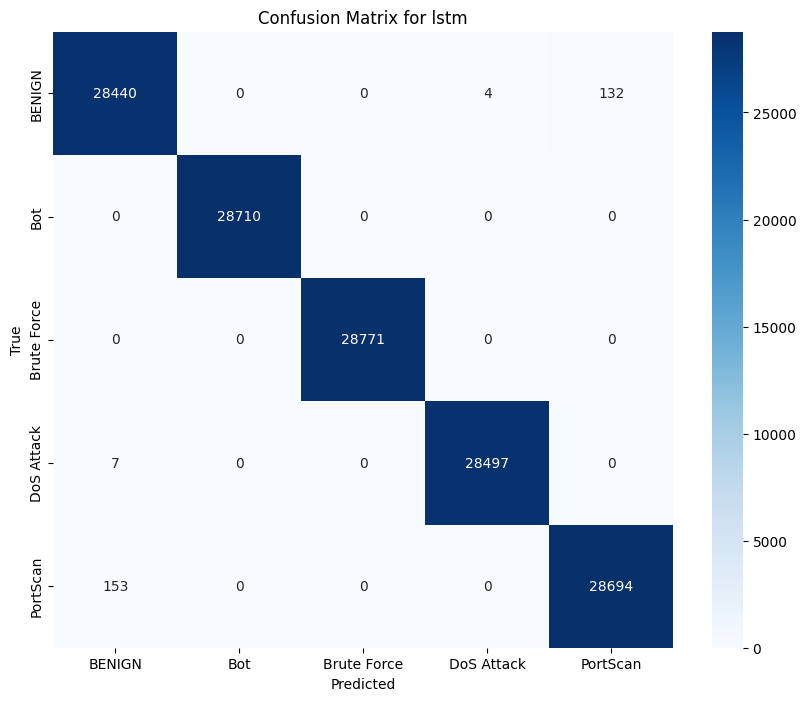

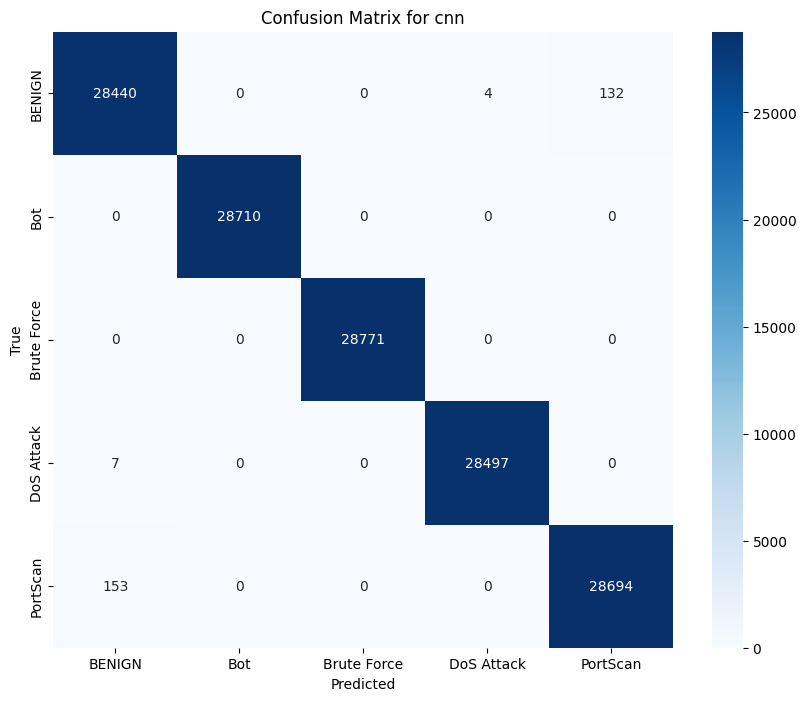

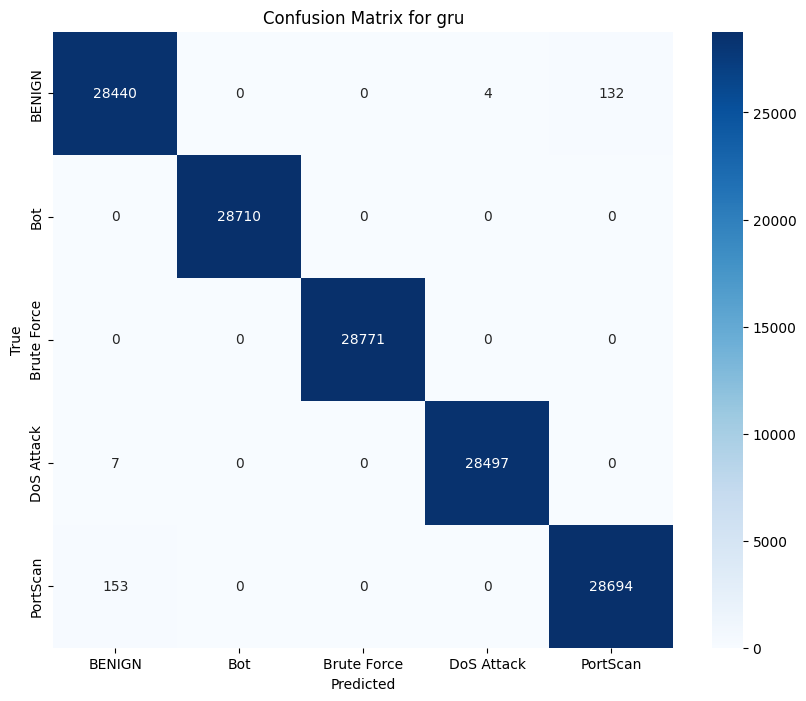

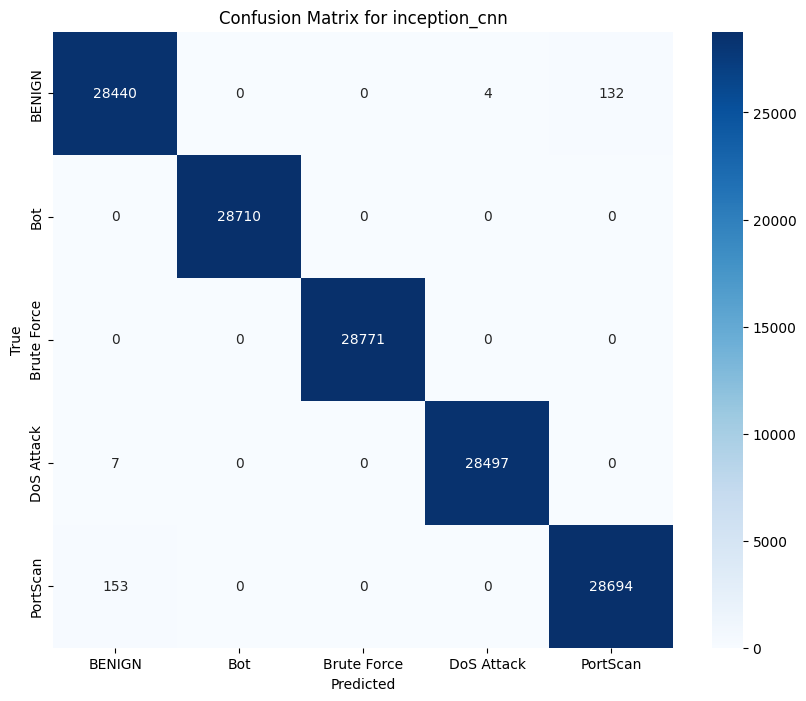

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, labels, model_name):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# After evaluating each model, plot the confusion matrix
for name, model in models.items():
    # Assuming y_pred_classes and y_test_classes are defined as in your script
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    plot_confusion_matrix(cm, label, name)

In [47]:
from tensorflow.keras.models import load_model

# Tải mô hình đã lưu
loaded_model = load_model("E:/DoAnTN/Train3_CIC2018/models/gru_model.h5")
y_pred = loaded_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
confusion_mat = confusion_matrix(y_test_classes, y_pred)
label = ["BENIGN", "Bot","Brute Force", "DoS Attack", "PortScan"]

# confusion matrix

df_cm = pd.DataFrame(confusion_mat, columns=label, index=label)
df_cm.head()

4482/4482 [==============================] - 91s 20ms/step


,BENIGN,Bot,Brute Force,DoS Attack,PortScan
BENIGN,28340,12,3,34,187
Bot,1,28709,0,0,0
Brute Force,0,0,28771,0,0
DoS Attack,31,0,0,28436,37
PortScan,214,0,0,1,28632


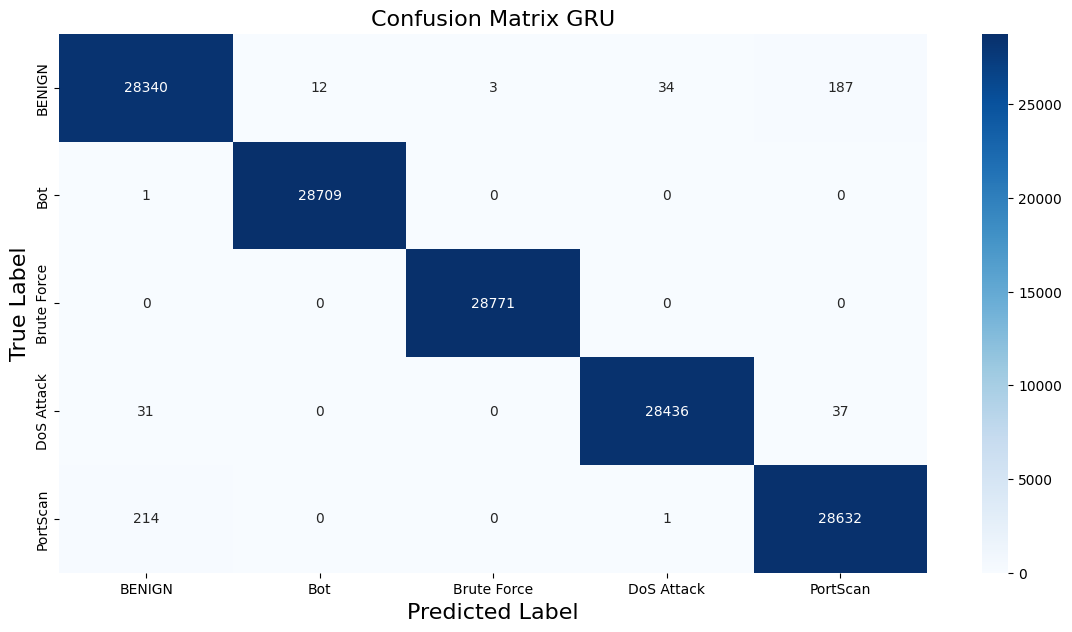

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt="g")
plt.title("Confusion Matrix GRU", fontsize=16)
plt.xlabel("Predicted Label", fontsize=16)
plt.ylabel("True Label", fontsize=16)
plt.show()
